# Predicting Product Taken

In [ ]:
# Binary Classification Problem

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings(action='ignore')
import pyttsx3
import pandas as pd

In [ ]:
voices=ssynth.getProperty('voices')
ssynth.setProperty('volume',70)
ssynth.setProperty('rate',170)
ssynth.setProperty('voice',voices[0].id)

In [ ]:
ssynth=pyttsx3.init()   
ssynth.say("In this project we will predict wheather a customer will buy a product or not on the basis of information given in the tour package dataset.The given problem is a binary classification problem.") 
ssynth.runAndWait()

# Reading File¶

In [ ]:
df=pd.read_csv('tour_package.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# Performing Basic Operations

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df.tail(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
df.sample()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1739,201739,0,36.0,Self Enquiry,1,12.0,Salaried,Male,2,3.0,Basic,3.0,Married,1.0,0,5,1,1.0,Executive,18210.0


In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [ ]:
df.shape

(4888, 20)

In [ ]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
len(df)

4888

In [ ]:
df['ProdTaken'].unique()

array([1, 0], dtype=int64)

# Eda:exploded data analysis &Visualization

# Fixing the Gender column

In [ ]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [ ]:
df['Gender']=df['Gender'].str.replace(' ','').str.capitalize()

In [ ]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [ ]:
df['Age'].min()

18.0

In [ ]:
df['Age'].max()

61.0

In [ ]:
#No. of people bought 
(df['ProdTaken']==1).sum()

920

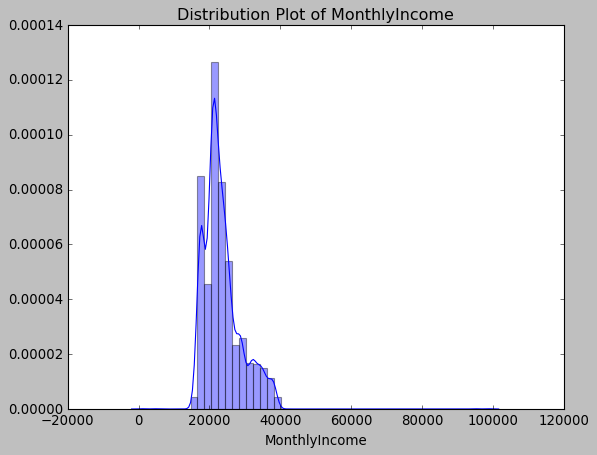

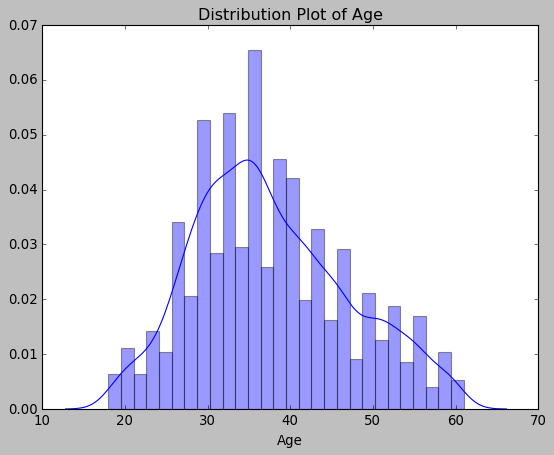

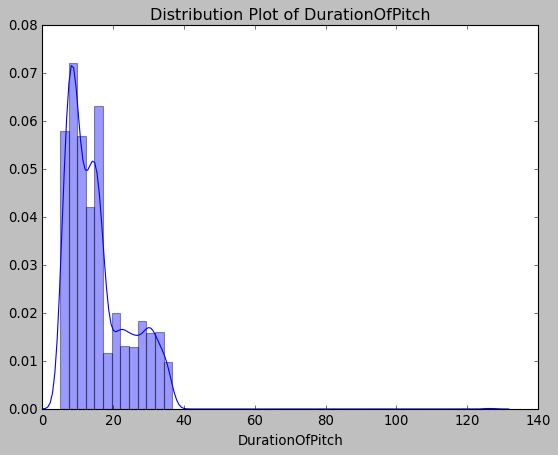

In [ ]:
# Distribution Plot of Continuous Numerical Columns
num_col=['MonthlyIncome','Age','DurationOfPitch']
for i in num_col:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Distribution Plot of ' + i)
    plt.show()

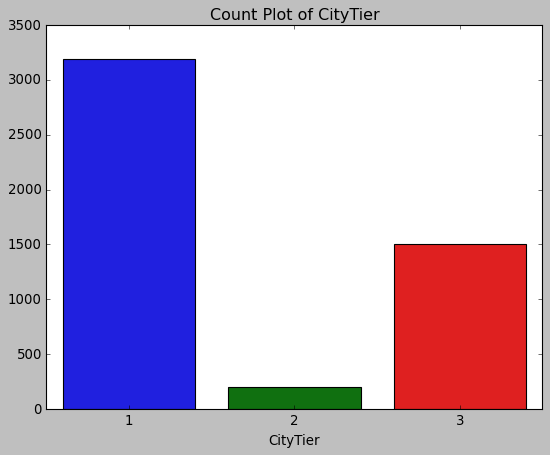

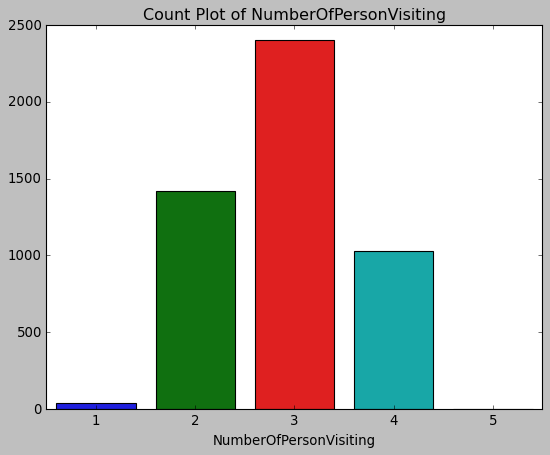

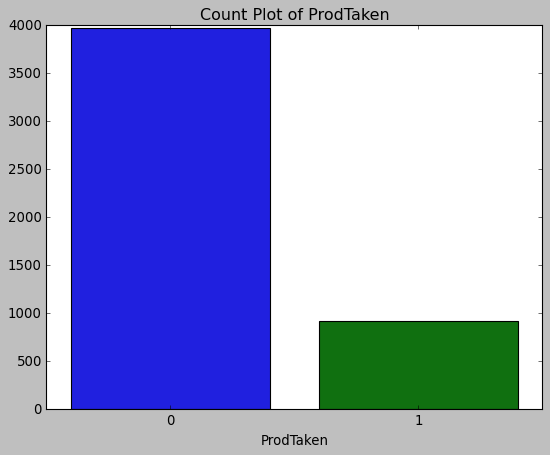

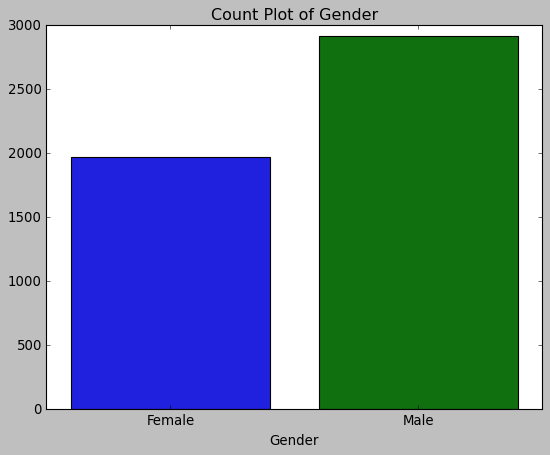

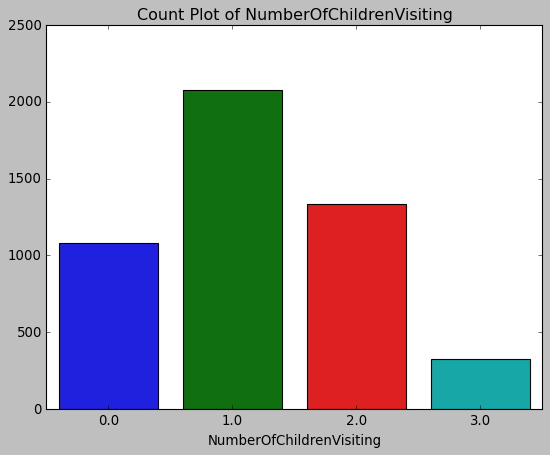

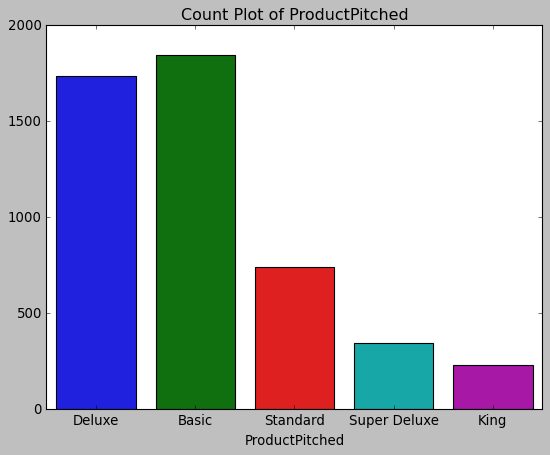

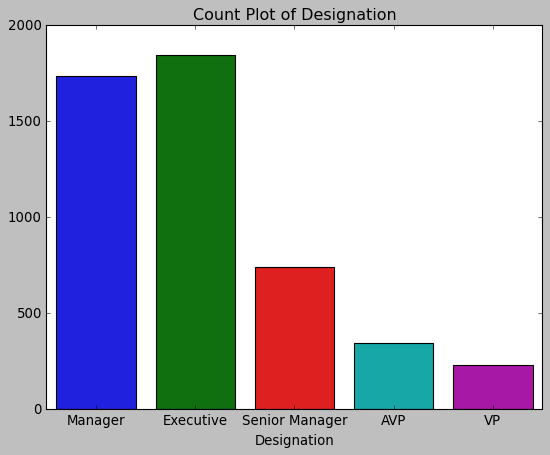

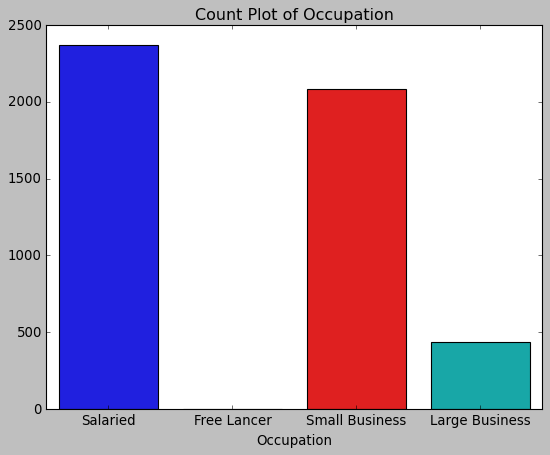

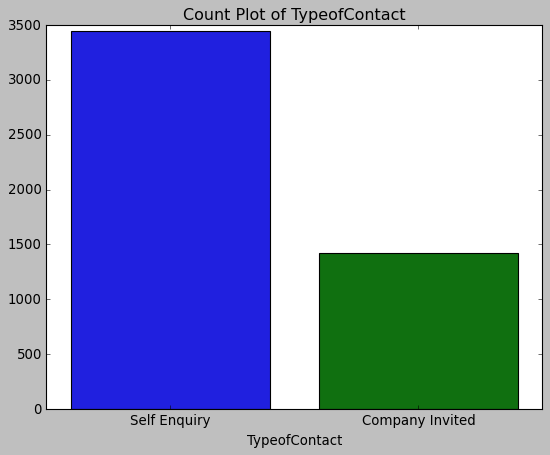

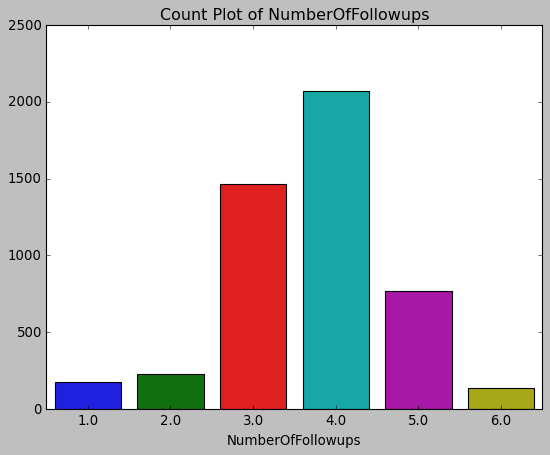

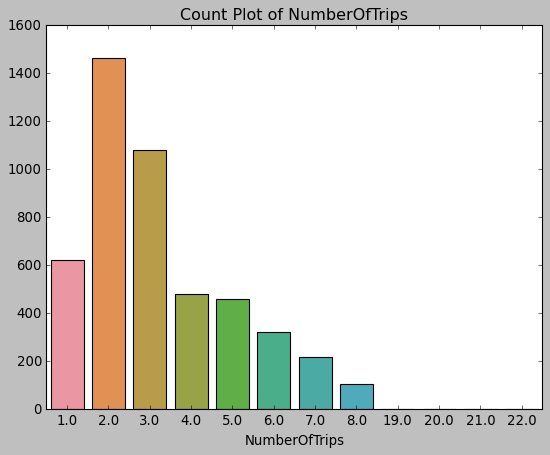

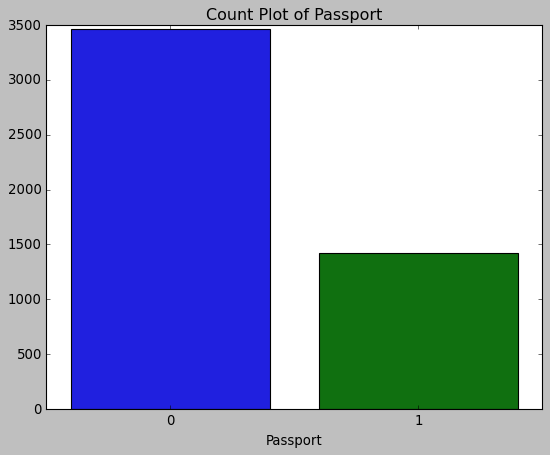

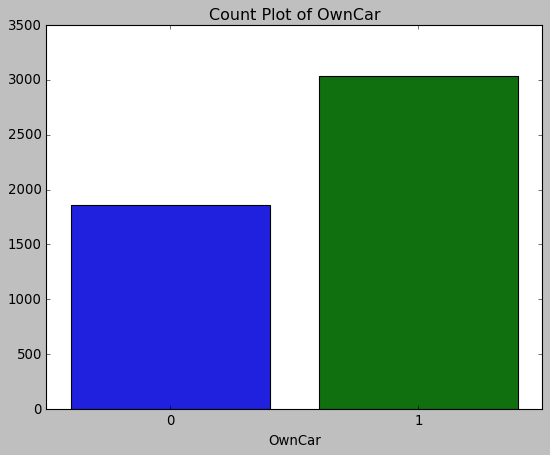

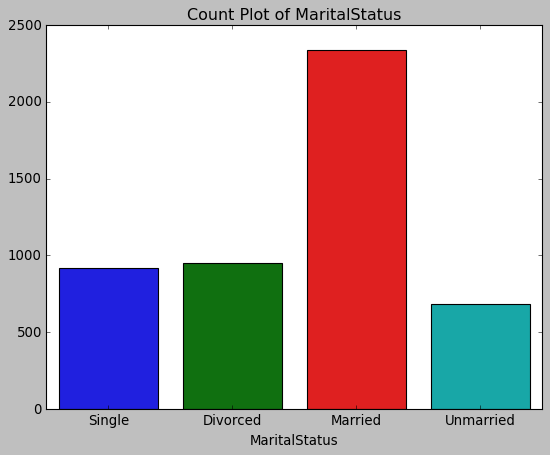

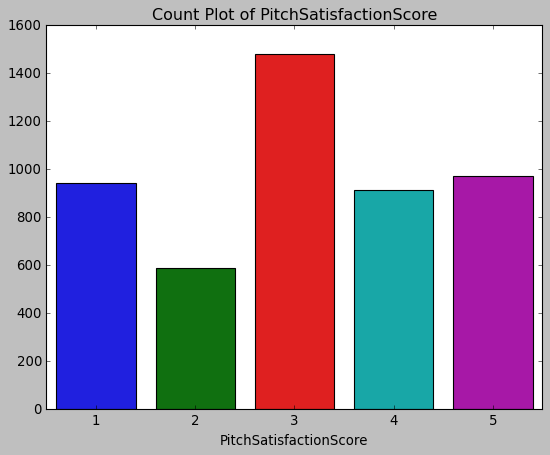

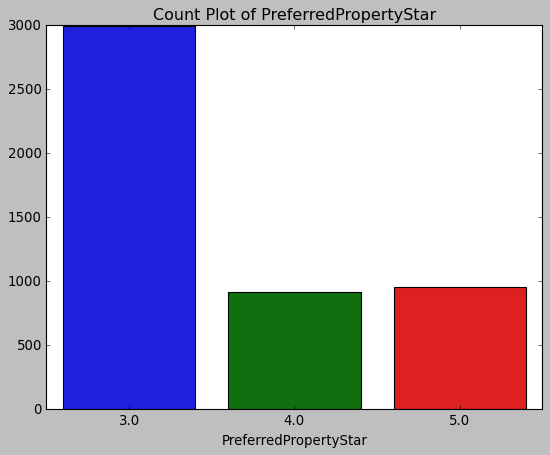

In [ ]:
# Count Plot of catagorical columns
cat_cols=['CityTier','NumberOfPersonVisiting','ProdTaken','Gender','NumberOfChildrenVisiting','ProductPitched','Designation','Occupation','TypeofContact','NumberOfFollowups','NumberOfTrips','Passport','OwnCar','MaritalStatus','PitchSatisfactionScore','PreferredPropertyStar']
for i in cat_cols:
    sns.countplot(df[i])
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Count Plot of ' + i)
    plt.show()

Text(0.5, 1.0, 'Box Plot of Age column')

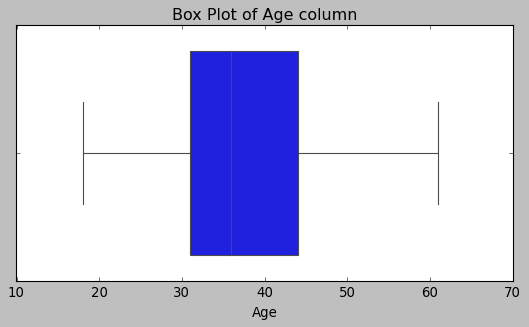

In [ ]:
#Box Plot of Age column
plt.figure(figsize=(8,4))
plt.style.use('classic')
_=sns.boxplot('Age',data=df)
plt.title('Box Plot of Age column')

In [ ]:
# Percentage of each catagory in product taken column
df['ProdTaken'].value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

Text(0.5, 1.0, 'Heatmap of Null Values')

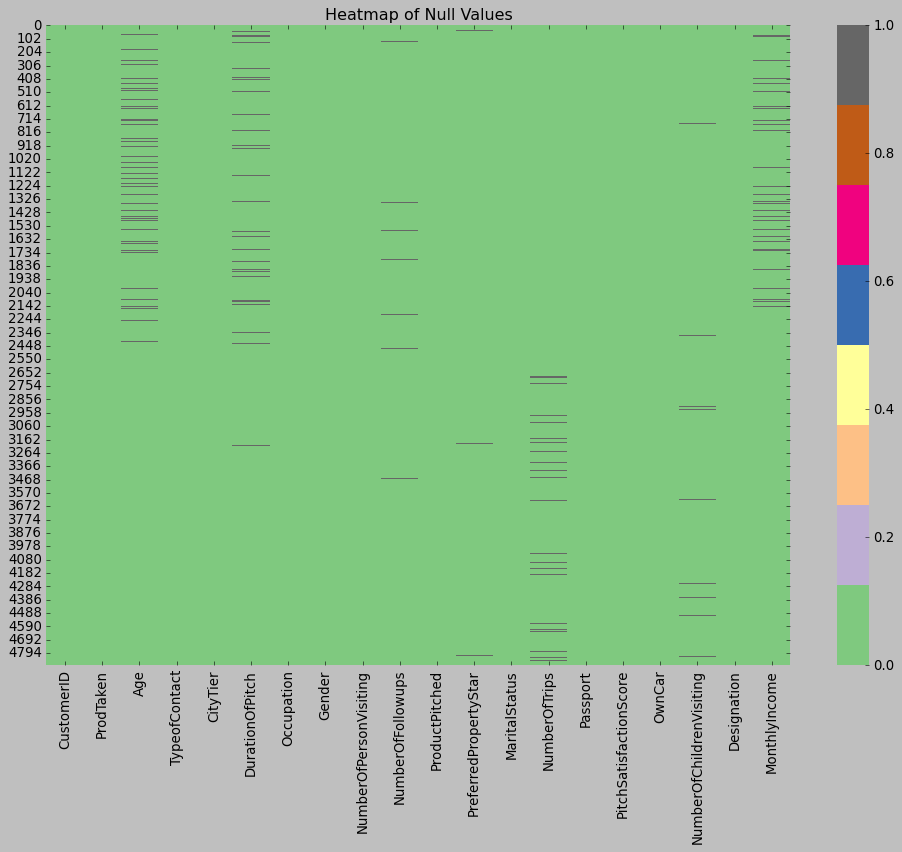

In [ ]:
# HeatMap of null Values
plt.figure(figsize=(15,10))
_=sns.heatmap(df.isna(),cbar=True,cmap='Accent')
plt.title('Heatmap of Null Values')

Text(0.5, 1.0, 'Corelation Heatmap')

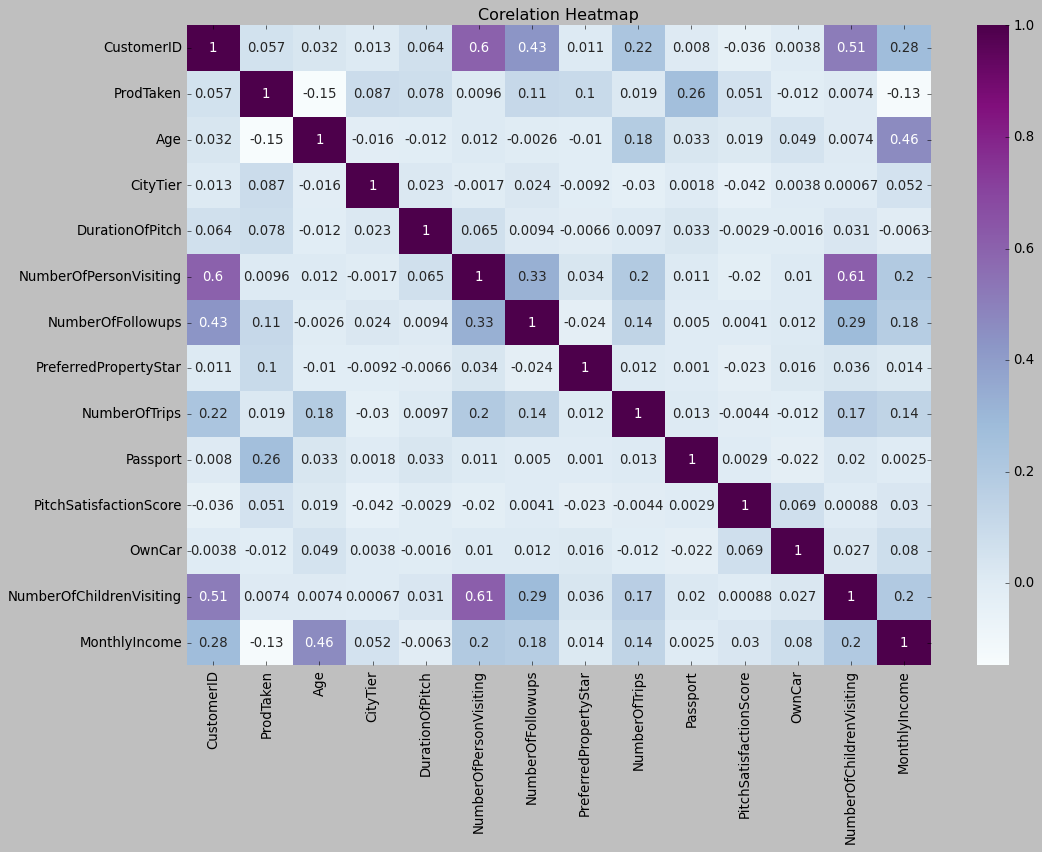

In [ ]:
#Corelation Heat MAP
plt.figure(figsize=(15,10))
_=sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('Corelation Heatmap')

# Handeling Missing Data

In [ ]:
df.isnull().mean()*100

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

# Missing Data Inputations

In [ ]:
df.fillna(value={'Age':df['Age'].mean(),'MonthlyIncome':df['MonthlyIncome'].mean(),'DurationOfPitch':df['DurationOfPitch'].mean(),'NumberOfTrips':df['NumberOfTrips'].mean(),'NumberOfChildrenVisiting':df['NumberOfChildrenVisiting'].mean()},inplace=True)

In [ ]:
df.dropna(inplace=True)

# After Inputations of Missing Data

In [ ]:
df.isnull().mean()*100

CustomerID                  0.0
ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
MonthlyIncome               0.0
dtype: float64

# Dropping Unwanted Columns

In [ ]:
df.drop(['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore','TypeofContact','CustomerID'],axis=1,inplace=True)

In [ ]:
len(df.columns)

14

In [ ]:
df.columns

Index(['ProdTaken', 'Age', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'MonthlyIncome'],
      dtype='object')

# Handeling Catagorical Features


<Figure size 1600x320 with 0 Axes>

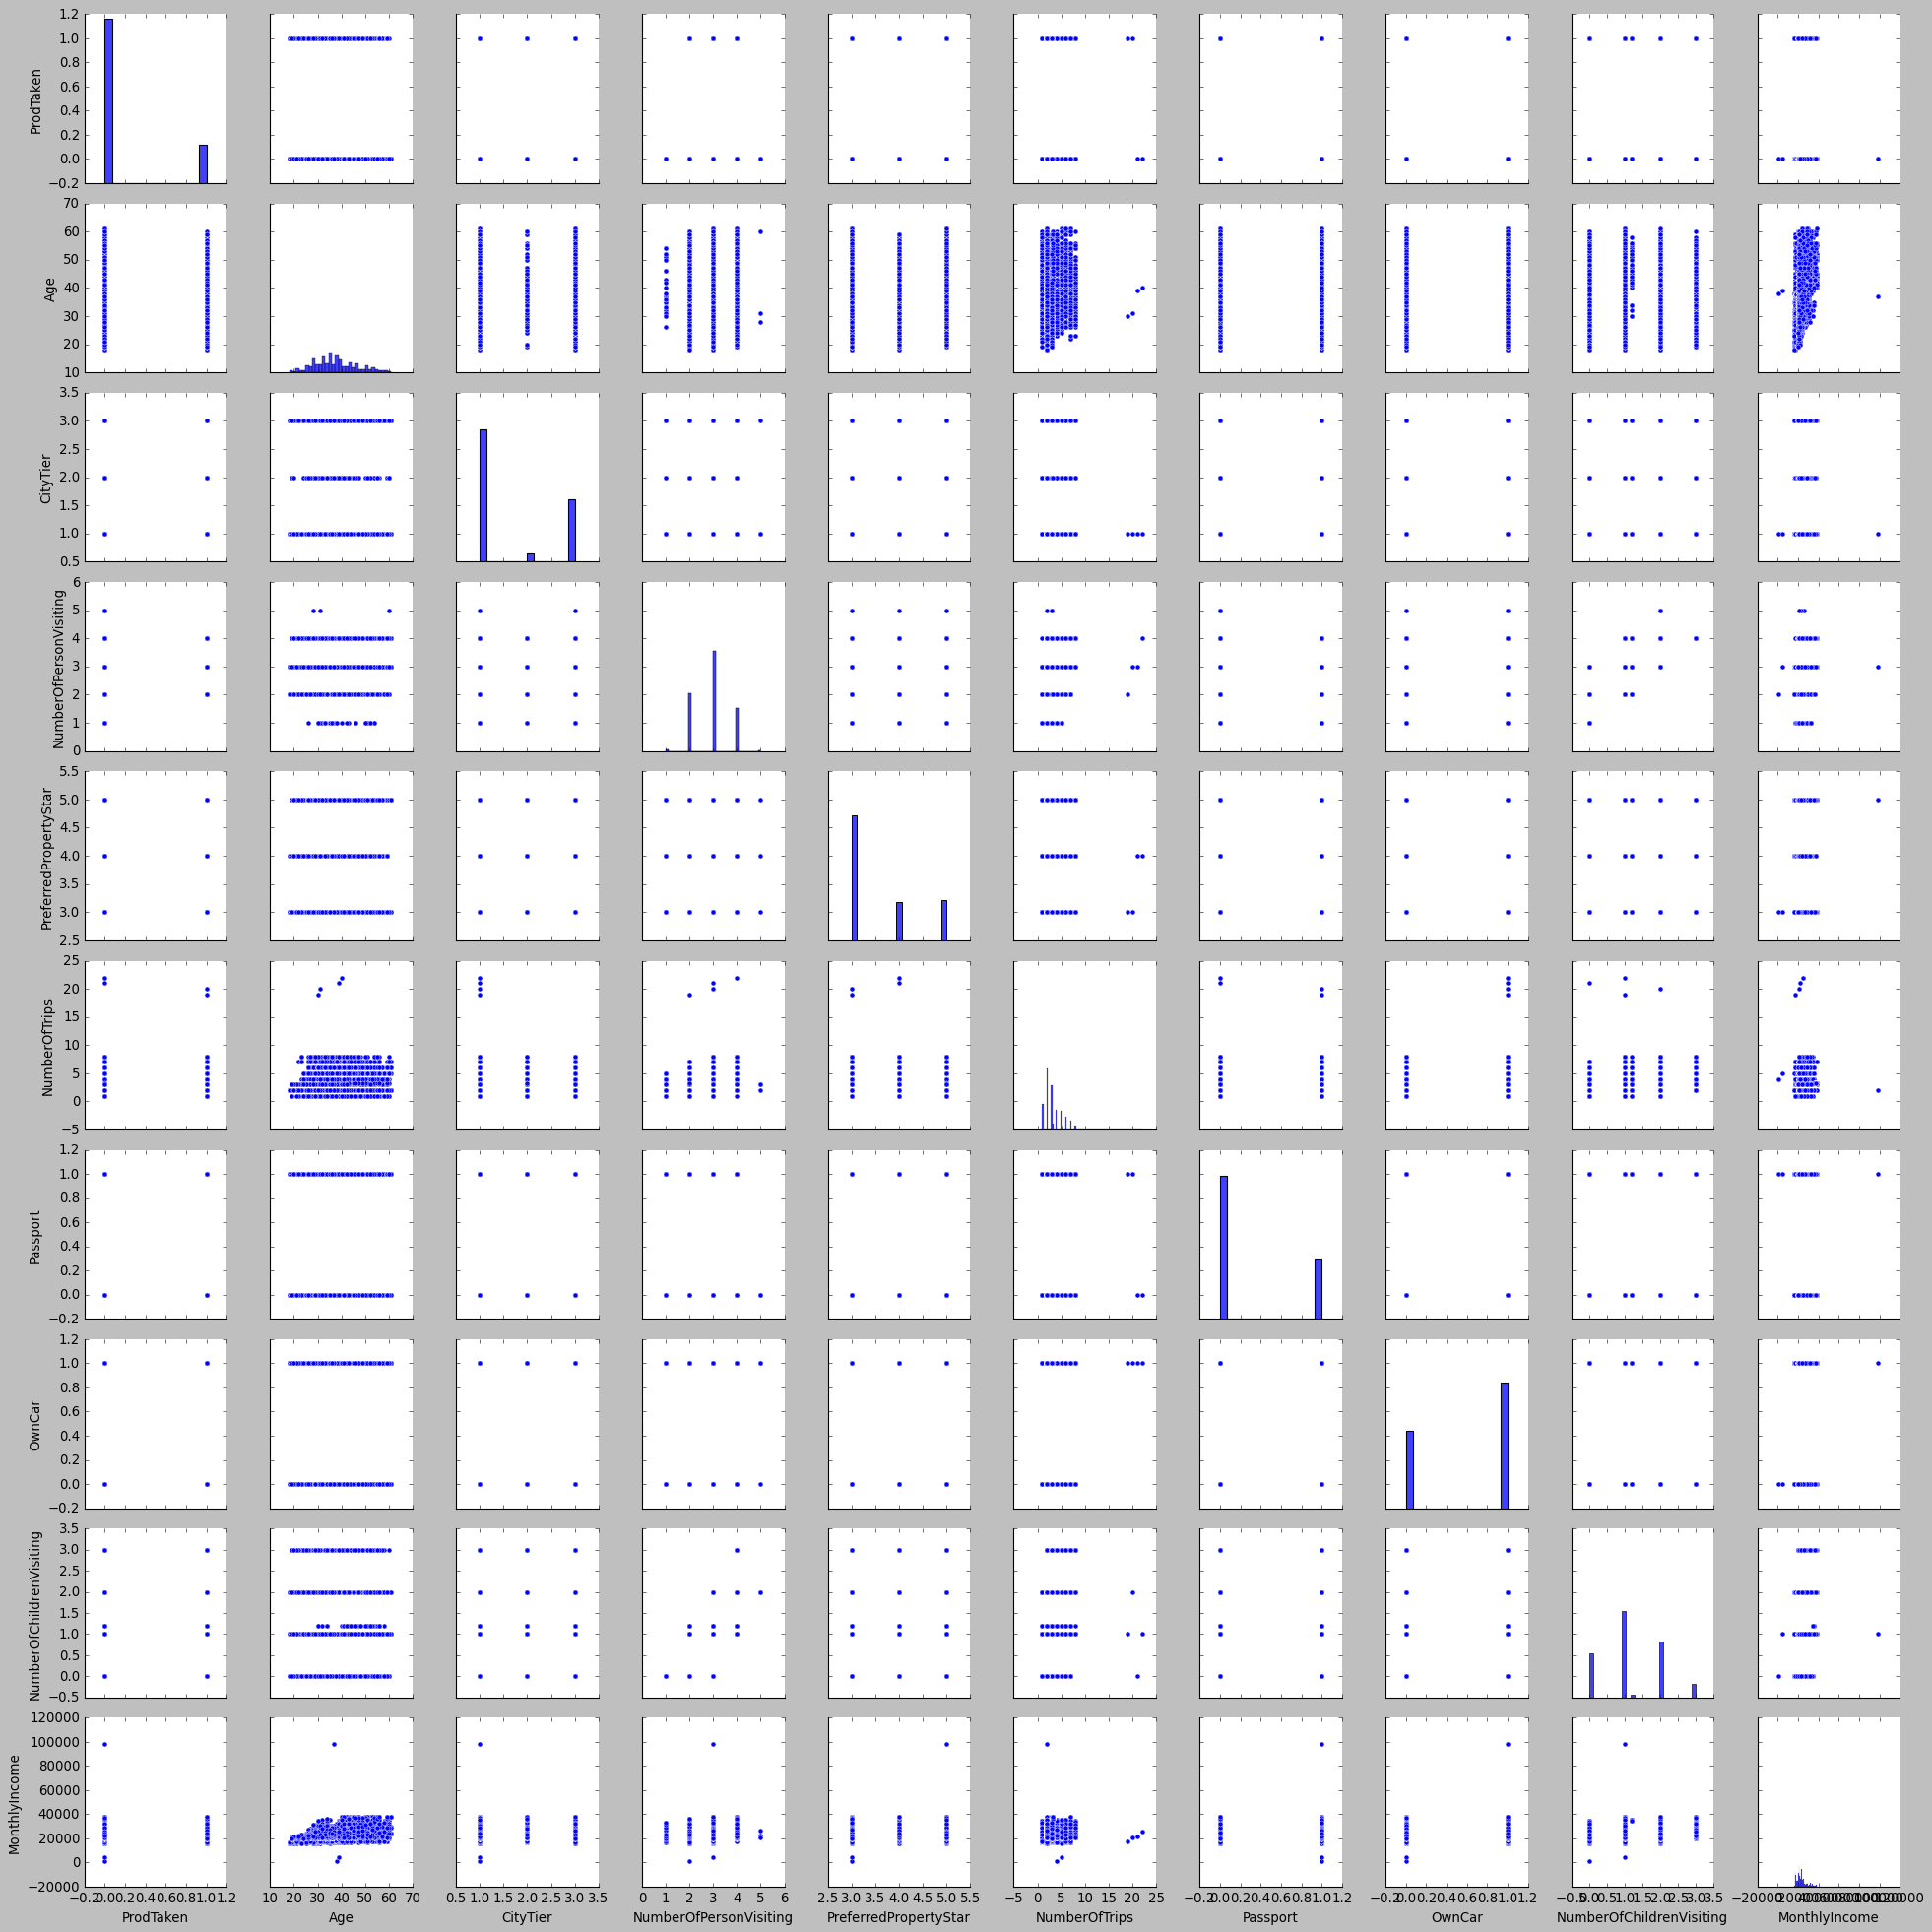

In [ ]:
# Designation,MaritalStatus,Occupation,Gender
plt.figure(figsize=(20,4))
_=sns.pairplot(df)

# Catagorical to Numerical Column

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.sample()

,ProdTaken,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,...,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3277,0,28.0,1,3,3.0,3.0,0,1,2.0,21217.0,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
df.shape

(4792, 21)

In [ ]:
df.columns

Index(['ProdTaken', 'Age', 'CityTier', 'NumberOfPersonVisiting',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Male', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

# Spliting into x and y

In [ ]:
x =df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [ ]:
x

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.000000,3,3,3.0,1.0,1,1,0.0,20993.0,0,1,0,0,0,1,0,0,1,0,0
1,49.000000,1,3,4.0,2.0,0,1,2.0,20130.0,0,1,0,1,0,0,0,0,1,0,0
2,37.000000,1,3,3.0,7.0,1,0,0.0,17090.0,0,0,0,1,0,1,0,1,0,0,0
3,33.000000,1,2,3.0,2.0,1,1,1.0,17909.0,0,1,0,0,0,0,0,1,0,0,0
4,37.622265,1,2,4.0,1.0,0,1,0.0,18468.0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,3,3,4.0,2.0,1,1,1.0,26576.0,0,0,1,1,0,0,1,0,1,0,0
4884,28.000000,1,4,3.0,3.0,1,1,2.0,21212.0,0,1,0,1,0,1,0,1,0,0,0
4885,52.000000,3,4,4.0,7.0,0,1,3.0,31820.0,0,1,0,0,1,0,0,0,0,1,0
4886,19.000000,3,3,3.0,3.0,0,0,2.0,20289.0,0,0,1,1,0,1,0,1,0,0,0


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4792, dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=0)

# Decision Test Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Predicting the result

In [ ]:
y_pred = dt.predict(x_test)

# Accuracy,Confusion Matrix & Classification Report

In [ ]:
print('Training Score:',100*dt.score(x_train,y_train))
print('Testing Score :',100*dt.score(x_test,y_test))

Training Score: 100.0
Testing Score : 78.71674491392801


In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_train = accuracy_score(x_train,y_train)
# print('Training accuracy',accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.7871674491392802


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion Matrix:\n ' + str(confusion_matrix(y_pred,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_pred,y_test)))

Confusion Matrix:
 [[2693  412]
 [ 404  325]]
_________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3105
           1       0.44      0.45      0.44       729

    accuracy                           0.79      3834
   macro avg       0.66      0.66      0.66      3834
weighted avg       0.79      0.79      0.79      3834



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt= RandomForestClassifier()
rt.fit(x_train,y_train)

RandomForestClassifier()

# Predicting the result

In [ ]:
y_prdr = rt.predict(x_test)

# Accuracy,Confusion Matrix & Classification Report

In [ ]:
print('Training Score:',100*rt.score(x_train,y_train))
print('Testing Score :',100*rt.score(x_test,y_test))

Training Score: 100.0
Testing Score : 83.95931142410016


In [ ]:
# accuracy_train = accuracy_score(x_train,y_train)
# print('Training accuracy',accuracy_train)
accuracy_test = accuracy_score(y_test, y_prdr)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.8395931142410016


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion Matrix:\n ' + str(confusion_matrix(y_prdr,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prdr,y_test)))

Confusion Matrix:
 [[3036  554]
 [  61  183]]
_________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      3590
           1       0.25      0.75      0.37       244

    accuracy                           0.84      3834
   macro avg       0.61      0.80      0.64      3834
weighted avg       0.93      0.84      0.87      3834



# SVM

In [ ]:
from sklearn.svm import SVC
sv_model=SVC()
sv_model.fit(x_train,y_train)

SVC()

# Predicting the result

In [ ]:
y_prds = sv_model.predict(x_test)

# Accuracy,Confusion Matrix & Classification Report

In [ ]:
print('Training Score:',100*sv_model.score(x_train,y_train))
print('Testing Score :',100*sv_model.score(x_test,y_test))

Training Score: 82.6722338204593
Testing Score : 80.77725612936881


In [ ]:
# accuracy_train = accuracy_score(x_train,y_train)
accuracy_test = accuracy_score(y_test, y_prds)
# print('Training accuracy',accuracy_train)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.807772561293688


In [ ]:
print('Confusion Matrix:\n ' + str(confusion_matrix(y_prds,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prds,y_test)))

Confusion Matrix:
 [[3097  737]
 [   0    0]]
_________________________
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89      3834
           1       0.00      0.00      0.00         0

    accuracy                           0.81      3834
   macro avg       0.50      0.40      0.45      3834
weighted avg       1.00      0.81      0.89      3834



# KNN

In [ ]:
from sklearn .neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Predicting the result

In [ ]:
y_prdk = knn_model.predict(x_test)

# Accuracy,Confusion Matrix & Classification Report

In [ ]:
print('Training Score:',100*knn_model.score(x_train,y_train))
print('Testing Score :',100*knn_model.score(x_test,y_test))

Training Score: 87.05636743215031
Testing Score : 76.83881064162755


In [ ]:
# accuracy_train = accuracy_score(x_train,y_train)
accuracy_test = accuracy_score(y_test, y_prdk)
# print('Training accuracy',accuracy_train)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.7683881064162754


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion Matrix:\n ' + str(confusion_matrix(y_prdk,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prdk,y_test)))

Confusion Matrix:
 [[2841  632]
 [ 256  105]]
_________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.86      3473
           1       0.14      0.29      0.19       361

    accuracy                           0.77      3834
   macro avg       0.53      0.55      0.53      3834
weighted avg       0.84      0.77      0.80      3834

